<a href="https://colab.research.google.com/github/Harshil323/Sementic-Code-Search/blob/main/SCS_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## in this second section we will create hte mebedding of docstring and function and create a search engine using nsmlib library, first few steps are already done in the part 1, weare doing here just for the reference

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 22.4 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 895 kB 33.4 MB/s 
     |████████████████████████████████| 6.5 MB 24.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# now connect with the google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
!pip install albert-tensorflow

     |████████████████████████████████| 81 kB 4.0 MB/s 


In [ ]:
!pip install SentencePiece

     |████████████████████████████████| 1.2 MB 5.5 MB/s 


In [ ]:
from transformers import AlbertTokenizer
from transformers import  AlbertConfig,TFAlbertModel
from transformers import AlbertTokenizer
from transformers import  AlbertConfig,TFAlbertModel
tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")

Downloading:   0%|          | 0.00/742k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

In [ ]:
config = AlbertConfig.from_pretrained('/content/gdrive/MyDrive/Config_and_model', output_hidden_states=True)

model = TFAlbertModel.from_pretrained('/content/gdrive/MyDrive/Config_and_model', config=config,  from_pt=True)
print(model.config)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['sop_classifier.classifier.bias', 'predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.bias', 'predictions.bias', 'albert.embeddings.position_ids', 'predictions.decoder.bias', 'predictions.dense.bias', 'sop_classifier.classifier.weight']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on,

AlbertConfig {
  "_name_or_path": "/content/gdrive/MyDrive/Config_and_model",
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 2,
  "classifier_dropout_prob": 0.1,
  "down_scale_factor": 1,
  "embedding_size": 128,
  "eos_token_id": 3,
  "gap_size": 0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "inner_group_num": 1,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "albert",
  "net_structure_type": 0,
  "num_attention_heads": 12,
  "num_hidden_groups": 1,
  "num_hidden_layers": 12,
  "num_memory_blocks": 0,
  "output_hidden_states": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "vocab_size": 30000
}



In [ ]:
import pandas as pd
import tensorflow as tf

# now load the training, validation and testing from the drive
train_df = pd.read_csv("/content/gdrive/MyDrive/SCE_dataset/train.csv")
print(len(train_df['docstring_tokens'].values))

26


In [ ]:
avg_embeddings = []
for count,item in enumerate(train_df['docstring_tokens'].values): #traverse thorugh all train data set docstrings
    e = tokenizer.encode(item, max_length=512)
    input = tf.constant(e)[None, :]  # Batch size 1
    output = model(input)
    v = [0]*768
    for i in range(1, len(input[0])-1):
        v = v + output[0][0][i].numpy()  # generate sentence vectors by averaging the word vectors
    avg_embeddings.append(v/len(input[0])) #append all sentence vectors into a list

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
# Save the sentence embeddings in a .tsv file
import csv
with open("/content/gdrive/MyDrive/SCE_dataset/avg_embeddings.tsv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter='\t')
    csvWriter.writerows(avg_embeddings)

## Convert function to vectors

In [ ]:
#importing libraries
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
with open('/content/gdrive/MyDrive/SCE_dataset/function_tokens.txt', 'w') as f:
    for item in train_df['function_tokens'].values:
        f.write("%s\n" % item)

In [ ]:
inp=pd.read_csv('/content/gdrive/MyDrive/SCE_dataset/function_tokens.txt',names=['functions'])
target=pd.read_csv('/content/gdrive/MyDrive/SCE_dataset/docstrings.txt',names=['docstrings'])

In [ ]:
import tokenizers

tokenizer_doc = tokenizers.BertWordPieceTokenizer(
    vocab=None,
    strip_accents=True,
    lowercase=True,
    wordpieces_prefix='##'
)

tokenizer_doc.train(
    files=['/content/gdrive/MyDrive/SCE_dataset/docstrings.txt'],
    vocab_size=30000,
    min_frequency=1,
    limit_alphabet=1000
)

In [ ]:

encoded = tokenizer_doc.encode('insertion sort')
print(encoded.ids)
print(encoded.tokens)

[446, 148]
['insertion', 'sort']


In [ ]:
#saving the docstring tokenizer
tokenizer_doc.save("/content/gdrive/MyDrive/SCE_dataset/doctring_vocab.txt")

In [ ]:

#Function tokenizer
tokenizer_func = tokenizers.BertWordPieceTokenizer(
    vocab=None,
    strip_accents=True,
    lowercase=True,
    wordpieces_prefix='##'
)


tokenizer_func.train(
    files=['/content/gdrive/MyDrive/SCE_dataset/function_tokens.txt'],
    vocab_size=30000,
    min_frequency=1,
    limit_alphabet=1000
)

encoded = tokenizer_func.encode("Insertion sort")
print(encoded.ids)
print(encoded.tokens)

[619, 223]
['insertion', 'sort']


In [ ]:
tokenizer_doc.save("/content/gdrive/MyDrive/SCE_dataset/function_tokens_vocab-vocab.txt")

In [ ]:
BATCH_SIZE = 1

In [ ]:
def encode(lang1, lang2):

    lang1 = tokenizer_func.encode("[CLS] " + [l.decode("utf-8")  for l in lang1.numpy()][0] + " [SEP]").ids
    lang2 = tokenizer_doc.encode("[CLS] " + [l.decode("utf-8")  for l in lang2.numpy()][0] + " [SEP]").ids

    return lang1, lang2


def tf_encode(func, doc):
    result_func, result_doc = tf.py_function(encode, [func, doc], [tf.int64, tf.int64])
    result_func.set_shape([None])
    result_doc.set_shape([None])

    return result_func, result_doc

### Here by using from_tensor_slices we create the slices of the inout and create the dataset
### for example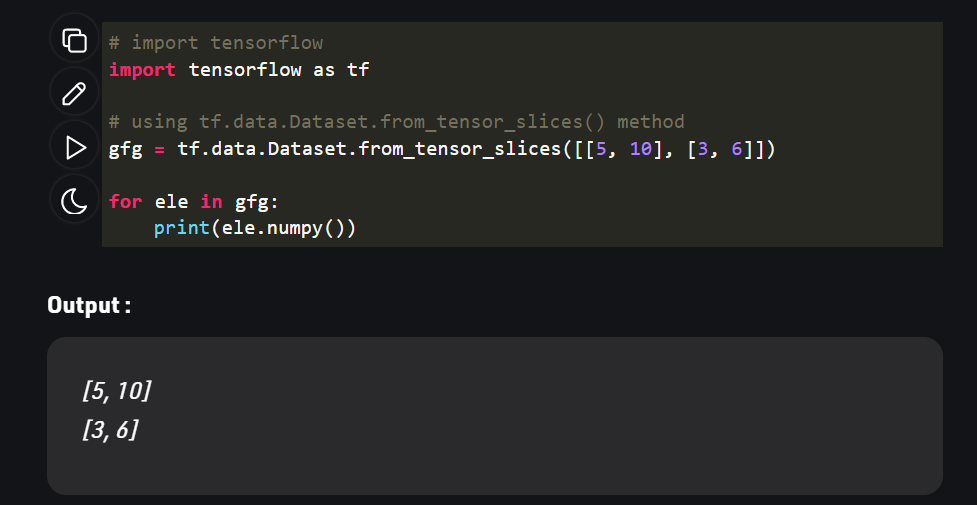

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((inp.values, target.values))
# Print values from dataset
for index,i in enumerate(dataset):
    print(i)
    if(index == 5):
        break

(<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'insertion sort elements for in range 1 len elements anchor elements 1 while 0 and anchor elements elements 1 elements 1 elements 1 anchor'],
      dtype=object)>, <tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'perform an insertion sort for given n elements of array'],
      dtype=object)>)
(<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'bead sort sequence list list if any not isinstance int or 0 for in sequence raise typeerror sequence must be list of non negative integers for in range len sequence for rod upper rod lower in enumerate zip sequence sequence 1 if rod upper rod lower sequence rod upper rod lower sequence 1 rod upper rod lower return sequence'],
      dtype=object)>, <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'pure implementation of bead sort in python'], dtype=object)>)
(<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'gaussian elimination coefficients np matrix vector np ndarray np ndarray

In [ ]:
train_dataset = dataset.map(tf_encode)
print(train_dataset)


train_dataset = train_dataset.padded_batch(BATCH_SIZE)


train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

<MapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
ft_batch, en_batch = next(iter(train_dataset))
ft_batch, en_batch

(<tf.Tensor: shape=(1, 26), dtype=int64, numpy=
 array([[  2, 619, 223, 220,  78,  67, 113,   6,  97, 220, 395, 220,   6,
         246,   5, 219, 395, 220, 220,   6, 220,   6, 220,   6, 395,   3]])>,
 <tf.Tensor: shape=(1, 12), dtype=int64, numpy=array([[  2, 232,  98, 446, 148, 142, 137,  18, 384,  68, 407,   3]])>)

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)


    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask


x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)


    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)


    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)

    return output, attention_weights

In [ ]:
def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(q, k, v, None)
    print ('Attention weights are:')
    print (temp_attn)
    print ('Output is:')
    print (temp_out)

In [ ]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates



def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)


    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])


    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)



pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)



(1, 50, 512)


In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)


        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)

        return output, attention_weights

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
          tf.keras.layers.Dense(dff, activation='relu'),
          tf.keras.layers.Dense(d_model)
      ])

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding,
                                                self.d_model)


        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        seq_len = tf.shape(x)[1]


        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
          x = self.enc_layers[i](x, training, mask)

        return x

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_layers': self.num_layers,
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'dff': self.dff,
            'input_vocab_size':self.input_vocab_size,
            'maximum_position_encoding':self.maximum_position_encoding,
            'rate':self.rate
        })
        return config

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)


    def call(self, x, enc_output, training,look_ahead_mask, padding_mask):


        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):

        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                 look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_layers': self.num_layers,
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'dff': self.dff,
            'target_vocab_size':self.target_vocab_size,
            'maximum_position_encoding':self.maximum_position_encoding,
            'rate':self.rate
        })
        return config

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                               input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                               target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask,
           look_ahead_mask, dec_padding_mask):

        enc_output = self.encoder(inp, training, enc_padding_mask)

        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_layers': self.num_layers,
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'dff': self.dff,
            'input_vocab_size':self.input_vocab_size,
            'target_vocab_size':self.target_vocab_size,
            'pe_input':self.pe_input,
            'pe_target':self.pe_target,
            'rate':self.rate
        })
        return config

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8


input_vocab_size = 30000
target_vocab_size = 30000
dropout_rate = 0.1

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

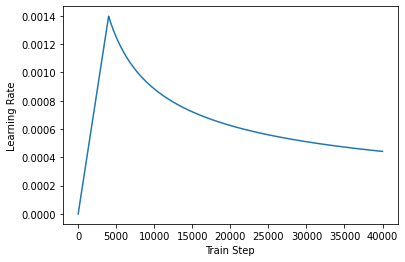

In [ ]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

In [ ]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size,
                          pe_input=input_vocab_size,
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [ ]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)



    dec_padding_mask = create_padding_mask(inp)
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
checkpoint_path = "/content/gdrive/MyDrive/Albert_model_output"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)


if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [ ]:
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(inp, tar_inp,
                                     True,
                                     enc_padding_mask,
                                     combined_mask,
                                     dec_padding_mask)
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)
    train_accuracy(tar_real, predictions)

In [ ]:
EPOCHS = 100

In [ ]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    train_accuracy.reset_states()


    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        if batch % 50 == 0:
            print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, batch, train_loss.result(), train_accuracy.result()))

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                             ckpt_save_path))

    print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1,
                                                train_loss.result(),
                                                train_accuracy.result()))

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 6.7288 Accuracy 0.0909
Epoch 1 Loss 6.0119 Accuracy 0.2508
Time taken for 1 epoch: 33.07243061065674 secs

Epoch 2 Batch 0 Loss 3.2374 Accuracy 0.3636
Epoch 2 Loss 3.9427 Accuracy 0.2696
Time taken for 1 epoch: 4.766602993011475 secs

Epoch 3 Batch 0 Loss 2.5356 Accuracy 0.4545
Epoch 3 Loss 3.1345 Accuracy 0.3605
Time taken for 1 epoch: 3.5599887371063232 secs

Epoch 4 Batch 0 Loss 2.0445 Accuracy 0.5455
Epoch 4 Loss 2.4402 Accuracy 0.4451
Time taken for 1 epoch: 3.564673662185669 secs

Epoch 5 Batch 0 Loss 1.3905 Accuracy 0.5455
Saving checkpoint for epoch 5 at /content/gdrive/MyDrive/Albert_model_output/ckpt-241
Epoch 5 Loss 2.1220 Accuracy 0.4483
Time taken for 1 epoch: 4.61852502822876 secs

Epoch 6 Batch 0 Loss 1.1841 Accuracy 0.6364
Epoch 6 Loss 1.9932 Accuracy 0.4639
Time taken for 1 epoch: 3.886242389678955 secs

Epoch 7 Batch 0 Loss 1.0230 Accuracy 0.7273
Epoch 7 Loss 1.5293 Accuracy 0.5235
Time taken for 1 epoch: 3.847721576690674 secs

Epoch 8 Batch 0 Lo

In [ ]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  4633088   
                                                                 
 decoder (Decoder)           multiple                  4898304   
                                                                 
 dense_64 (Dense)            multiple                  3870000   
                                                                 
Total params: 13,401,392
Trainable params: 13,401,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def evaluate(inp_sentence):


    inp_sentence = tokenizer_func.encode("[CLS]"+inp_sentence+"[SEP]").ids
    encoder_input = tf.expand_dims(inp_sentence, 0)


    decoder_input = tokenizer_doc.encode("[CLS]").ids
    output = tf.expand_dims(decoder_input, 0)

    for i in range(50):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
            encoder_input, output)

        predictions, attention_weights = transformer(encoder_input,
                                                     output,
                                                     False,
                                                     enc_padding_mask,
                                                     combined_mask,
                                                     dec_padding_mask)


        predictions = predictions[: ,-1:, :]

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)


        if predicted_id == 3:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def translate(sentence, plot=''):
    result, attention_weights = evaluate(sentence)

    predicted_sentence = tokenizer_doc.decode([i for i in result
                                            ])

    print('Input: {}'.format(sentence))
    print('Predicted translation: {}'.format(predicted_sentence))

In [ ]:
x=pd.read_csv('/content/gdrive/MyDrive/SCE_dataset/function_tokens.txt',names=['functions'])
y = pd.read_csv('/content/gdrive/MyDrive/SCE_dataset/docstrings.txt',names=['docstrings'])

In [ ]:
translate(x['functions'][0])
print ("Real translation: ",y['docstrings'][0])

Input: insertion sort elements for in range 1 len elements anchor elements 1 while 0 and anchor elements elements 1 elements 1 elements 1 anchor
Predicted translation: perform an insertion sort for given n elements of array
Real translation:  perform an insertion sort for given n elements of array


In [ ]:
translate(x['functions'][3])
print ("Real translation: ",y['docstrings'][3])

Input: decrypt cipher list int key list int str plain for in range len key int cipher key 2 key plain append chr return join for in plain
Predicted translation: function to convert a decimal to binary
Real translation:  function to decrypt text using pseudo random numbers


In [ ]:
translate(x['functions'][13])
print ("Real translation: ",y['docstrings'][13])

Input: split string str separator str list split words last index 0 for index char in enumerate string if char separator split words append string last index index last index index 1 elif index 1 len string split words append string last index index 1 return split words
Predicted translation: returns the image with corners identified img path
Real translation:  will split the string up into all the values separated by the separator


## Using transformer to generate function vectors

In [ ]:
input_functions=pd.read_csv('/content/gdrive/MyDrive/SCE_dataset/function_tokens.txt',names=['functions'])

In [ ]:
import fileinput
import sys

from contextlib import closing

n_features = 768
def read_csv():
  # Reading multiple files using FileInput. Note the order of the input matters and it is in the order provided that files are read
  # closing ensures the file object is destroyed after use.
    with closing(fileinput.input(files=('/content/gdrive/MyDrive/SCE_dataset/avg_embeddings.tsv'))) as finput:
        for index,line in enumerate(finput):
            record = line.rstrip().split('\t')
            features = [float(n) for n in record]
            function = tokenizer_func.encode(input_functions['functions'].values[index]).ids
            yield function,features

def get_dataset():
    generator = lambda: read_csv()
    return tf.data.Dataset.from_generator(
        generator, (tf.int32,tf.float32), ((None,),(768)))

In [ ]:
d = get_dataset()

In [ ]:
train_dataset = d
print(train_dataset)

BATCH_SIZE = 1
train_dataset = train_dataset.padded_batch(BATCH_SIZE,padded_shapes=((None,), (768,)))

<FlatMapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int32, name=None), TensorSpec(shape=(768,), dtype=tf.float32, name=None))>


In [ ]:


def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates



def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)


    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])


    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)



pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)



5
(1, 50, 512)


In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)


    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)


    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)

    return output, attention_weights

In [ ]:
def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(q, k, v, None)
    print ('Attention weights are:')
    print (temp_attn)
    print ('Output is:')
    print (temp_out)

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model  # typically 512

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)


        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)

        return output, attention_weights

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
          tf.keras.layers.Dense(dff, activation='relu'),
          tf.keras.layers.Dense(d_model)
      ])

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding,
                                                self.d_model)


        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        seq_len = tf.shape(x)[1]

        # adding embedding and position encoding.
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x  # (batch_size, input_seq_len, d_model)

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_layers': self.num_layers,
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'dff': self.dff,
            'input_vocab_size':self.input_vocab_size,
            'maximum_position_encoding':self.maximum_position_encoding,
            'rate':self.rate
        })
        return config

In [ ]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print (sample_encoder_output.shape)

(64, 62, 512)


In [ ]:
# bt creating a modified transformer we will be converting function code to 768 dimensional vector
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                               input_vocab_size, pe_input, rate)
        self.lstm = tf.keras.layers.LSTM(1000)

        self.final_layer = tf.keras.layers.Dense(768)

    def call(self, inp, training, enc_padding_mask):

        enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
        lstm_output = self.lstm(enc_output)
        final_output = self.final_layer(lstm_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output

In [ ]:
sample_transformer = Transformer(num_layers=2, d_model=512, num_heads=8, dff=2048,input_vocab_size=8500,pe_input=10000)

temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)

fn_out = sample_transformer(temp_input, training=False,enc_padding_mask=None)

fn_out.shape  # (batch_size, 768)

TensorShape([64, 768])

In [ ]:
sample_transformer.summary()

Model: "transformer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_2 (Encoder)         multiple                  10656768  
                                                                 
 lstm (LSTM)                 multiple                  6052000   
                                                                 
 dense_89 (Dense)            multiple                  768768    
                                                                 
Total params: 17,477,536
Trainable params: 17,477,536
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8


input_vocab_size = 30000
dropout_rate = 0.1

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

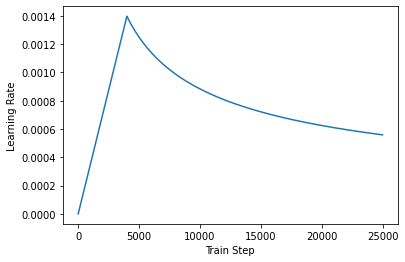

In [ ]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(25000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [ ]:
# we use cosine similairty as the loss we wish to optimize on
loss_object = tf.keras.losses.CosineSimilarity(axis=1)

In [ ]:
# our loss function
def loss_function(real, pred):
    loss = loss_object(real, pred)

    return loss

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [ ]:
modified_transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size,
                          pe_input=input_vocab_size,
                          rate=dropout_rate)

In [ ]:
# we only create the encoder mask
def create_masks(inp):
    enc_padding_mask = create_padding_mask(inp)

    return enc_padding_mask

In [ ]:
EPOCHS = 100
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int32),
    tf.TensorSpec(shape=(None, None), dtype=tf.float32),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):

    enc_padding_mask = create_masks(inp)

    with tf.GradientTape() as tape:
        predictions = modified_transformer(inp,
                                     True,
                                     enc_padding_mask)
        loss = loss_function(tar, predictions)

    gradients = tape.gradient(loss, modified_transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, modified_transformer.trainable_variables))

    train_loss(loss)

In [ ]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()

    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)

        if batch % 50 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1, batch, train_loss.result()))

    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                             ckpt_save_path))

    print ('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                                train_loss.result(), ))

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.5584
Saving checkpoint for epoch 1 at /content/gdrive/MyDrive/Albert_model_output/ckpt-277
Epoch 1 Loss -0.7046
Time taken for 1 epoch: 27.82369065284729 secs

Epoch 2 Batch 0 Loss -0.9541
Saving checkpoint for epoch 2 at /content/gdrive/MyDrive/Albert_model_output/ckpt-278
Epoch 2 Loss -0.9635
Time taken for 1 epoch: 23.631070137023926 secs

Epoch 3 Batch 0 Loss -0.9574
Saving checkpoint for epoch 3 at /content/gdrive/MyDrive/Albert_model_output/ckpt-279
Epoch 3 Loss -0.9647
Time taken for 1 epoch: 23.799383640289307 secs

Epoch 4 Batch 0 Loss -0.9570
Saving checkpoint for epoch 4 at /content/gdrive/MyDrive/Albert_model_output/ckpt-280
Epoch 4 Loss -0.9645
Time taken for 1 epoch: 24.005786180496216 secs

Epoch 5 Batch 0 Loss -0.9567
Saving checkpoint for epoch 5 at /content/gdrive/MyDrive/Albert_model_output/ckpt-281
Epoch 5 Loss -0.9644
Time taken for 1 epoch: 24.38269329071045 secs

Epoch 6 Batch 0 Loss -0.9562
Saving checkpoint for epoch 6 at /content/gdrive/

In [ ]:
modified_transformer.summary()

Model: "transformer_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_3 (Encoder)         multiple                  4633088   
                                                                 
 lstm_1 (LSTM)               multiple                  4516000   
                                                                 
 dense_114 (Dense)           multiple                  768768    
                                                                 
Total params: 9,917,856
Trainable params: 9,917,856
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modified_transformer.layers[0].set_weights(transformer.layers[0].get_weights())

In [ ]:
def generate_embeddings(inp_sentence):
    encoder_input = tf.expand_dims(inp_sentence, 0)
    enc_padding_mask, = create_masks(encoder_input)
    predictions = modified_transformer(encoder_input,False,enc_padding_mask)
    return predictions[0].numpy()

In [ ]:
test_df = pd.read_csv("/content/gdrive/MyDrive/SCE_dataset/test.csv")

In [ ]:
inp = tokenizer_func.encode(test_df['function_tokens'][0]).ids
generate_embeddings(inp)

array([-3.19565964e+00, -7.29658222e+00,  2.08378506e+00, -3.28660101e-01,
        4.48142481e+00,  1.20974946e+00, -2.04044557e+00,  1.06964064e+00,
       -4.87977743e-01, -3.30551982e-01,  4.85921413e-01, -2.79793000e+00,
       -3.97344542e+00,  1.06538093e+00,  1.02450681e+00,  5.59530556e-01,
       -1.29391789e+00,  2.31831002e+00,  4.92425084e-01,  4.47319889e+00,
       -4.34895694e-01,  1.63595164e+00, -2.77629876e+00,  6.67954636e+00,
        1.66181743e+00,  9.03267264e-01, -1.18071043e+00, -2.01154739e-01,
       -4.10045266e-01,  3.74779916e+00, -2.94214320e+00,  5.27373195e-01,
        2.44345045e+00,  4.85236216e+00, -2.91850972e+00, -2.51544571e+00,
        5.55612612e+00,  3.98942876e+00, -1.01296687e+00,  5.07270575e+00,
        7.61745393e-01,  2.11264563e+00,  3.97109795e+00,  4.69851446e+00,
        1.63764203e+00,  7.63232374e+00, -1.72009420e+00,  2.70621681e+00,
        1.02773023e+00,  2.10076308e+00, -3.45624328e+00, -2.13247466e+00,
       -5.10749435e+00, -

In [ ]:
func_vector = []
for i in range(len(train_df['function_tokens'].values)):
    inp = tokenizer_func.encode(train_df['function_tokens'][i]).ids
    func_vector.append(generate_embeddings(inp))

import csv
# Store the fucntion vectors in a .tsv file
with open("/content/gdrive/MyDrive/SCE_dataset/func_vectors.tsv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter='\t')
    csvWriter.writerows(func_vector)

In [ ]:
print(len(func_vector))

26


In [ ]:
# Load the ALBERT model to convert the query into a vector
from transformers import AlbertTokenizer, TFAlbertModel

albert_tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")

from transformers import  AlbertConfig

config = AlbertConfig.from_pretrained('/content/gdrive/MyDrive/Config_and_model', output_hidden_states=True)

model = TFAlbertModel.from_pretrained('/content/gdrive/MyDrive/Config_and_model', config=config,  from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.bias', 'albert.embeddings.position_ids', 'sop_classifier.classifier.bias', 'predictions.decoder.bias', 'sop_classifier.classifier.weight', 'predictions.dense.bias', 'predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on,

In [ ]:
!pip install nmslib

In [ ]:
import nmslib
search_index = nmslib.init(method='hnsw', space='cosinesimil')
e = np.loadtxt('/content/gdrive/MyDrive/SCE_dataset/func_vectors.tsv',delimiter='\t')
search_index.addDataPointBatch(e)
# Create our search indices
search_index.createIndex(print_progress=True)

In [ ]:
def search(query):
    e = albert_tokenizer.encode(query, max_length=512)
    input = tf.constant(e)[None, :]
    output = model(input)
    v = [0]*768
    for i in range(1, len(input[0])-1):
        v = v + output[0][0][i].numpy()
    emb = v/len(input[0])

    # Search five nearest neighbours, their index value and cosine distances are returned
    idxs, dists = search_index.knnQuery(emb, k=5)


    for idx, dist in zip(idxs, dists):
            code = train_df['original_function'][idx]

            print(f'cosine dist:{dist:.4f} \n   \n {code} \n---------------------------------\n')

In [ ]:
search('matrix multiplication') # Search

cosine dist:0.0838 
   
 def inverse(matrix: list[list]) ->(list[list] | None):
    """
    Inverse of a matrix a with n Dimension
    """
    det = determinant(matrix)
    if det == 0:
        return None
    matrix_minor = [[determinant(minor(matrix, i, j)) for j in range(len(
        matrix))] for i in range(len(matrix))]
    cofactors = [[(x * (-1) ** (row + col)) for col, x in enumerate(
        matrix_minor[row])] for row in range(len(matrix))]
    adjugate = list(transpose(cofactors))
    return scalar_multiply(adjugate, 1 / det)
 
---------------------------------

cosine dist:0.0856 
   
 def multiply(matrix_a: list[list], matrix_b: list[list]) ->list[list]:
    """
    Regular matrix multiplication using list
    """
    if _check_not_integer(matrix_a) and _check_not_integer(matrix_b):
        rows, cols = _verify_matrix_sizes(matrix_a, matrix_b)
    if cols[0] != rows[1]:
        raise ValueError(
            f'Cannot multiply matrix of dimensions ({rows[0]},{cols[0]}) and (

In [ ]:
search('Function for bubble sort')

cosine dist:0.0873 
   
 def procentual_proximity(source_data: list[list[float]], weights: list[int]
    ) ->list[list[float]]:
    """
    function to find procentual proximity.
    """
    data_lists: list[list[float]] = []
    for data in source_data:
        for i, el in enumerate(data):
            if len(data_lists) < i + 1:
                data_lists.append([])
            data_lists[i].append(float(el))
    score_lists: list[list[float]] = []
    for dlist, weight in zip(data_lists, weights):
        mind = min(dlist)
        maxd = max(dlist)
        score: list[float] = []
        if weight == 0:
            for item in dlist:
                try:
                    score.append(1 - (item - mind) / (maxd - mind))
                except ZeroDivisionError:
                    score.append(1)
        elif weight == 1:
            for item in dlist:
                try:
                    score.append((item - mind) / (maxd - mind))
                except ZeroDivisionError:
    

In [ ]:
search("How to create a bed sort")

cosine dist:0.0421 
   
 def decimal_to_binary(no_of_variable: int, minterms: Sequence[float]) ->list[
    str]:
    """
    function to convert a decimal to binary
    """
    temp = []
    for minterm in minterms:
        string = ''
        for i in range(no_of_variable):
            string = str(minterm % 2) + string
            minterm //= 2
        temp.append(string)
    return temp
 
---------------------------------

cosine dist:0.0424 
   
 def scalar_multiply(matrix: list[list], n: (int | float)) ->list[list]:
    """
   Scalar multuplication of a matrix
    """
    return [[(x * n) for x in row] for row in matrix]
 
---------------------------------

cosine dist:0.0434 
   
 def is_isomorphic(s, t):
    """
    Given two strings s and t, determine if they are isomorphic.
    Two strings are isomorphic if the characters in s can be replaced to get t.
    All occurrences of a character must be replaced with another character while
    preserving the order of characters. No tw

In [ ]:
search("how to find procentual proximity")

cosine dist:0.0293 
   
 def procentual_proximity(source_data: list[list[float]], weights: list[int]
    ) ->list[list[float]]:
    """
    function to find procentual proximity.
    """
    data_lists: list[list[float]] = []
    for data in source_data:
        for i, el in enumerate(data):
            if len(data_lists) < i + 1:
                data_lists.append([])
            data_lists[i].append(float(el))
    score_lists: list[list[float]] = []
    for dlist, weight in zip(data_lists, weights):
        mind = min(dlist)
        maxd = max(dlist)
        score: list[float] = []
        if weight == 0:
            for item in dlist:
                try:
                    score.append(1 - (item - mind) / (maxd - mind))
                except ZeroDivisionError:
                    score.append(1)
        elif weight == 1:
            for item in dlist:
                try:
                    score.append((item - mind) / (maxd - mind))
                except ZeroDivisionError:
    